In [26]:
import numpy as np
from matplotlib import pyplot as plt
import warnings
import time
warnings.simplefilter(action='ignore', category=RuntimeWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

mandel 1 t: 1.205106258392334
julia t: 0.8493962287902832


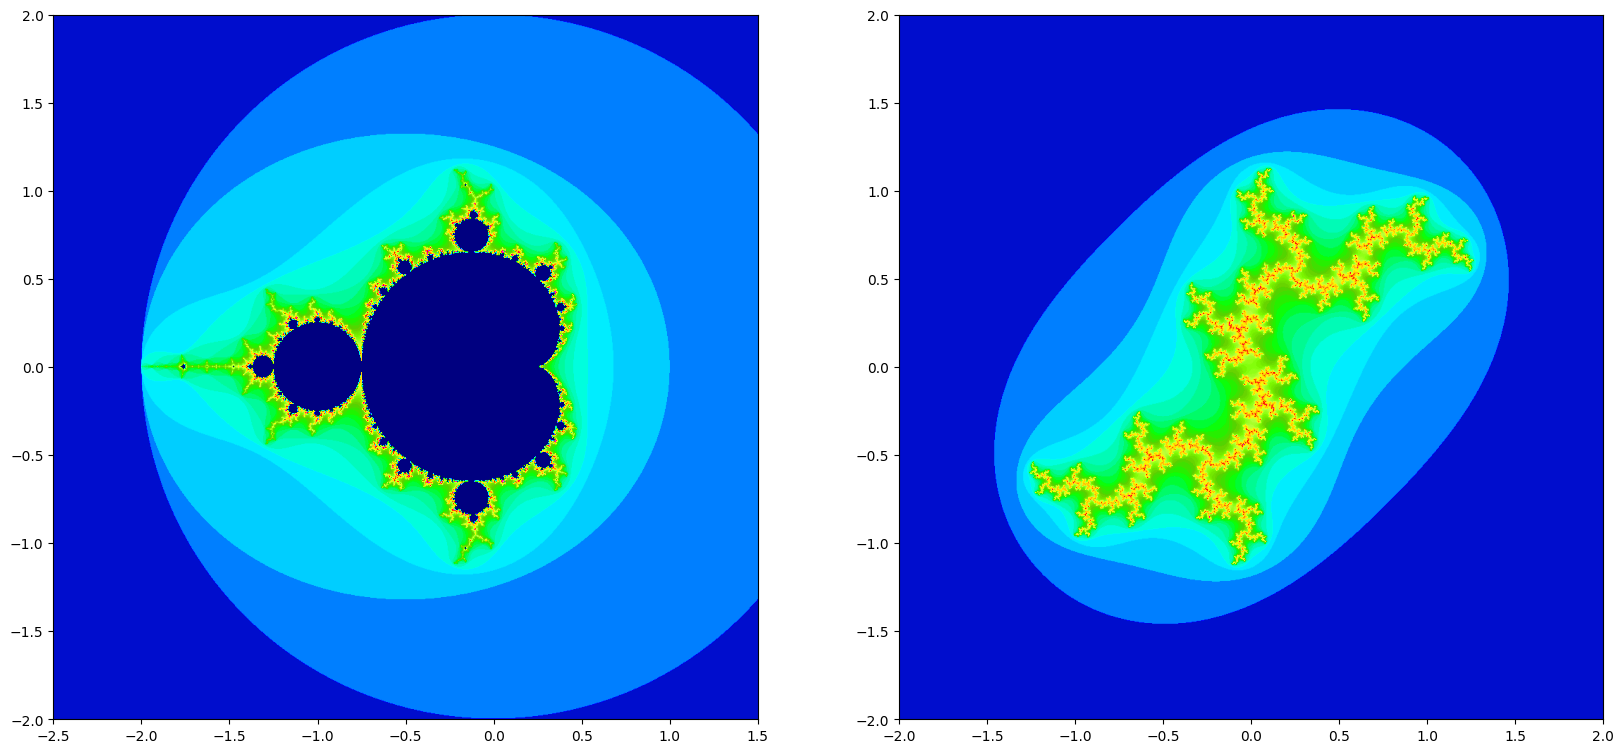

In [42]:
def draw_mandelbrot(x_min, x_max, y_min, y_max, res):
    t = time.time()
    x=np.linspace(x_min,x_max,res)
    y=np.linspace(y_min,y_max,res)
    c = np.add.outer(y*1j, x)
    im = np.zeros_like(c, dtype=np.int16)
    z = np.zeros_like(c)

    for i in range(100):
        z = z**2 + c
        im[(abs(z) > 2) & (im == 0)]=i+1
    print('mandel 1 t:', time.time() - t)
    return im

def draw_julia(x_min, x_max, y_min, y_max, c, res):
    t = time.time()

    x=np.linspace(x_min,x_max,res)
    y=np.linspace(y_min,y_max,res)
    z = np.add.outer(y*1j, x)
    im = np.zeros_like(z, dtype=np.int16)

    for i in range(100):
        z = z**2 + c
        im[(abs(z) > 2) & (im == 0)]=i+1
    print('julia t:', time.time() - t)
    return im
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 10))
ax1.imshow(np.sqrt(draw_mandelbrot(-2.5, 1.5, -2,2, 1000)), extent=[-2.5,1.5,-2,2], cmap='gist_ncar')
ax2.imshow(np.sqrt(draw_julia(-2, 2,-2,2, 0.8j, 1000)), extent=[-2,2,-2,2], cmap='gist_ncar')
fig.show()


In [53]:
from ipycanvas import Canvas

cs = Canvas(width=1600, height=800)
im = draw_mandelbrot(-2.5, 1.5, -2,2, 800)
im2 = np.sqrt(np.stack([im, im, im], axis=2)/ np.max(im))*255
im = draw_julia(-2, 2,-2,2,0.8j, 800)
im3 = np.sqrt(np.stack([im, im, im], axis=2)/ np.max(im))*255
cs.put_image_data(im2, 0,0)
cs.put_image_data(im3,800,0)
cs

mandel 1 t: 0.6668670177459717
julia t: 0.5369808673858643


Canvas(height=800, width=1600)